In [1]:
import numpy as np

def upper_bound(x, l):
    return np.exp(l * x + l * np.log(l) + (1 - l) * np.log(1 - l))

def lower_bound(x, ksi):
    l = 0.5 * (sigma(ksi) - 0.5) / ksi
    return sigma(ksi) * np.exp((x - ksi) / 2 - l * (x * x - ksi * ksi))

def f(x):
    return (sigma(x) - 0.5) / x / 2.

def sigma(x):
    return 1. / (1. + np.exp(-x))

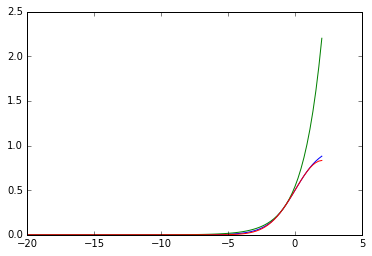

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-20, 2, 100)
plt.plot(x, sigma(x))
plt.plot(x, upper_bound(x, 0.7))
plt.plot(x, lower_bound(x, 0.5))

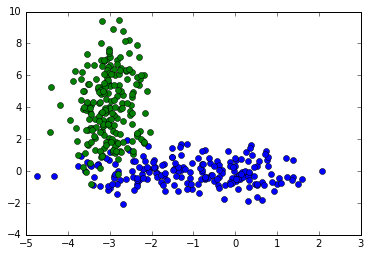

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

n1 = 100
n2 = 210
x1, y1 = np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]], n1).T
x2, y2 = np.random.multivariate_normal([-2, 0], [[1, 0], [0, 0.5]], n1).T
x1 = np.hstack((x1, x2))
y1 = np.hstack((y1, y2))
plt.plot(x1, y1, 'o')
x3, y3 = np.random.multivariate_normal([-3, 4], [[0.2, 0], [0, 5]], n2).T
plt.plot(x3, y3, 'o')

class1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
class2 = np.concatenate([x3.reshape(-1, 1), y3.reshape(-1, 1)], axis=1)
y = np.ones(2 * n1 + n2)
y[:2 * n1] *= -1
X = np.concatenate((class1, class2))

In [4]:
from rvm import RVM
# Automatically reload imports.
%load_ext autoreload
%autoreload 2

In [5]:
est = RVM(n_iter=2500, threshold_alpha=1e9)
l = est.fit(X, y)

-47.7372158315
-40.0372121886


In [6]:
print est.alpha_.shape[0]

print est.alpha_

2
[ 0.0127101   0.07854636]


In [7]:
print est.mu_, est.w_

[-8.86575577  3.56703086] [-8.69482707  3.49894022]


In [8]:
print est.lb(est.w_), est.f(est.w_), est.ub(est.w_)

-44.9490075542 -44.6366543247 -44.6366543247


In [9]:
print est.lb(est.w_) <= est.f(est.w_), est.f(est.w_) <= est.ub(est.w_)

True True


In [10]:
def lower_bound(est, n = 0, delta_w = 4, n_points = 100):
    w = est.w_.copy()
    w_domain = np.linspace(w[n] - delta_w, w[n] + delta_w, n_points)
    ret = np.zeros(n_points)
    for i in xrange(n_points):
        w[n] = w_domain[i]
        ret[i] = est.lb(w)
    return w_domain, ret

In [11]:
def upper_bound(est, n = 0, delta_w = 4, n_points = 100):
    w = est.w_.copy()
    w_domain = np.linspace(w[n] - delta_w, w[n] + delta_w, n_points)
    ret = np.zeros(n_points)
    for i in xrange(n_points):
        w[n] = w_domain[i]
        ret[i] = est.ub(w)
    return w_domain, ret

In [12]:
def f(est, n = 0, delta_w = 4, n_points = 100):
    w = est.w_.copy()
    w_domain = np.linspace(w[n] - delta_w, w[n] + delta_w, n_points)
    ret = np.zeros(n_points)
    for i in xrange(n_points):
        w[n] = w_domain[i]
        ret[i] = est.f(w)
    return w_domain, ret

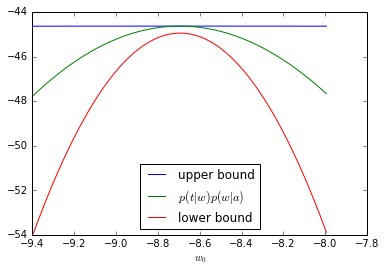

In [15]:
n = 0
delta_w = 0.7
plt.plot(upper_bound(est, n=n, delta_w=delta_w)[0], upper_bound(est, n=n, delta_w=delta_w)[1], label='upper bound')
plt.plot(f(est, n=n, delta_w=delta_w)[0], f(est, n=n, delta_w=delta_w)[1], label='$p(t|w)p(w|a)$')
plt.plot(lower_bound(est, n=n, delta_w=delta_w)[0], lower_bound(est, n=n, delta_w=delta_w)[1], label='lower bound')
plt.xlabel('$w_%d$' % n)
plt.legend(loc='best')